### Импортируем необходимые библиотеки

In [111]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

###  Задаем все необходимые данные

In [112]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356, 407, 448])
print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


In [117]:
# Обязательно приводим в матричный вид
features_reshaped = features.reshape(-1, 1)
print(features_reshaped)

[[1]
 [2]
 [3]
 [5]
 [6]
 [7]]


In [116]:
model = LinearRegression() # Модель линейной регрессии от sklearn
model.fit(features_reshaped, labels) # Обучает модель на основе признаков features_reshaped предсказывать labels

# Вывод коэффициента и пересечения
print('Коэффициент:', model.coef_)
print('Пересечение:', model.intercept_)

Коэффициент: [50.39285714]
Пересечение: 99.59523809523819


In [118]:
new_point = np.array([[4]])
predicted_label = model.predict(new_point) # Предсказывает по 4 целевое значение predicted_label
print('Предсказанное значение для 4:', predicted_label)

Предсказанное значение для 4: [301.16666667]


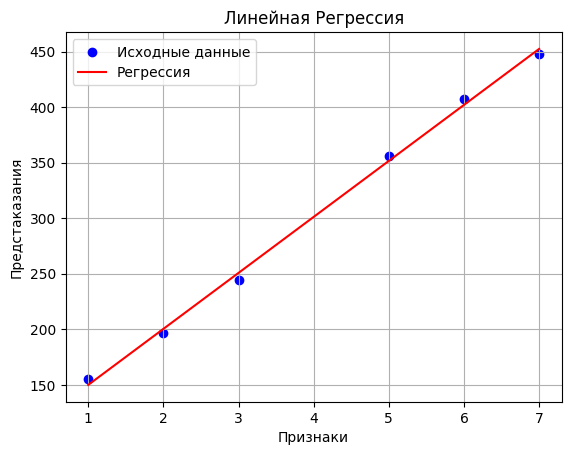

In [43]:
predicted_labels = model.predict(features_reshaped)

plt.scatter(features, labels, color='blue', label = 'Исходные данные')
plt.plot(features, predicted_labels, color='red', label='Регрессия')

plt.xlabel('Признаки')
plt.ylabel('Предстаказания')
plt.title('Линейная Регрессия')
plt.legend()
plt.grid(True)
plt.show()

# Домашняя работа

## 3.3

### Прогнозирование цен на дома

**Данные:**
| Дом | Площадь | Цена |
|-----|---------|------|
| 1   | 100     | 200  |
| 2   | 200     | 475  |
| 3   | 200     | 400  |
| 4   | 250     | 520  |
| 5   | 325     | 735  |

**Модель:**  
`цена = 2 × площадь + 50`

**Задания:**
1. Рассчитать прогнозные цены
2. Вычислить MAE
3. Вычислить MSE

**MAE** = среднее |факт - прогноз|  
**MSE** = среднее (факт - прогноз)²я MSE: усредните квадраты разницзницы в квадрат, затем усредните

In [119]:
# Генерируем ДатаФрейм
df = pd.DataFrame({'Дом':[1, 2, 3, 4, 5], 'Размер(s)':[100, 200, 200, 250, 325], 'Вознаграждение(p)':[200, 475, 400, 520, 735]})

In [120]:
df

,Дом,Размер(s),Вознаграждение(p)
0,1,100,200
1,2,200,475
2,3,200,400
3,4,250,520
4,5,325,735


In [121]:
#A
df['Предсказанная цена'] = (2 * df['Размер(s)'] + 50) # Создаем новый столбец с предсказанной ценной

In [122]:
df

,Дом,Размер(s),Вознаграждение(p),Предсказанная цена
0,1,100,200,250
1,2,200,475,450
2,3,200,400,450
3,4,250,520,550
4,5,325,735,700


In [124]:
#Б
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df['Вознаграждение(p)'], df['Предсказанная цена']) # Значение истинное и значение предсказанное
print(f"Средняя абсолютная ошибка: {mae:.2f}")

Средняя абсолютная ошибка: 38.00


In [125]:
#Или используя мат.формулу
mae_math = np.dot(np.sum(np.array(np.abs(df['Вознаграждение(p)'] - df['Предсказанная цена']))), 1/5)

In [126]:
mae_math

38.0

In [128]:
#В
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(df['Вознаграждение(p)'], df['Предсказанная цена'])) # Значение истинное и значение предсказанное
print(f"Среднеквадратичная ошибка: {mse:.2f}")

Среднеквадратичная ошибка: 39.37


In [129]:
#Или используя мат.формулу
mse_math = np.sqrt(np.dot(np.sum(np.array(np.power(df['Вознаграждение(p)'] - df['Предсказанная цена'], 2))), 1/5))

In [130]:
mse_math

39.370039370059054

#### 3.4

Дана прямая $ŷ = 2x + 3$, необходимо переместить её ближе к точку $(x, y)=(5,15)$ используя абсолютный и квадратический подход. Скорость обучения задать как $η=0.01$

In [131]:
#A
def abs_trick(intercept, coeff, points, learning_rate):
    x = points[0]
    y_pred = points[1]
    y_now = coeff * x + intercept
    if y_now < y_pred:
        coeff += learning_rate * x
        intercept += learning_rate
    elif y_now > y_pred:
        coeff -= learning_rate * x
        intercept -= learning_rate
        
    return intercept, coeff

In [108]:
abs_trick(3, 2, (5, 15), 0.01)

(3.01, 2.05)

In [109]:
#Б
def squared_trick(intercept, coeff, points, learning_rate):
    x = points[0]
    y_pred = points[1]
    y_now = coeff * x + intercept
    coeff += learning_rate * (y_pred-y_now) * x
    intercept += learning_rate* (y_pred-y_now)
    return intercept, coeff

In [110]:
squared_trick(3, 2, (5, 15), 0.01)

(3.02, 2.1)